In [1]:
%matplotlib inline

import csv, random, numpy as np
from keras.models import load_model, Sequential,model_from_json
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Cropping2D
from keras.preprocessing.image import img_to_array, load_img, flip_axis, random_shift
from keras.layers.advanced_activations import ELU
from keras.regularizers import l2, activity_l2
from keras import optimizers

from keras.callbacks import Callback,ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from math import floor

import cv2
from PIL import Image
import json
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def random_darken(image):
    """Given an image (from Image.open), randomly darken a part of it."""
    w, h = image.size

    # Make a random box.
    x1, y1 = random.randint(0, w), random.randint(0, h)
    x2, y2 = random.randint(x1, w), random.randint(y1, h)

    # Loop through every pixel of our box (*GASP*) and darken.
    for i in range(x1, x2):
        for j in range(y1, y2):
            new_value = tuple([int(x * 0.5) for x in image.getpixel((i, j))])
            image.putpixel((i, j), new_value)
    return image

In [3]:
def process_image_test(image, steering_angle, augment=True, shape=(160,320)):
    """Process and augment an image."""

    pil_image = Image.fromarray(image)

    if augment and random.random() < 0.5:
        pil_image = random_darken(pil_image)  # before numpy'd

    image = img_to_array(pil_image)
      
    
    if augment:
        image_shift = random_shift(image, 0.05, 0.4, 0, 1, 2)  # only vertical
        if random.random() < 0.5:
            image_shift = flip_axis(image, 1)
            steering_angle = -steering_angle
      
    return image, steering_angle,  pil_image, image_shift

In [4]:
path = './examples/udacity1.jpg' 
                    
srcBGR = cv2.imread(path)
          #      destRGB = cv2.cvtColor(srcBGR, cv2.COLOR_BGR2RGB)
                      
new_img = cv2.cvtColor(srcBGR , cv2.COLOR_BGR2YUV)
#new_img = cv2.cvtColor(srcBGR , cv2.COLOR_BGR2RGB)
                         
raw_angle = float(0)
                
input_image, input_angle, pil_image, image_shift = process_image_test(new_img, raw_angle)

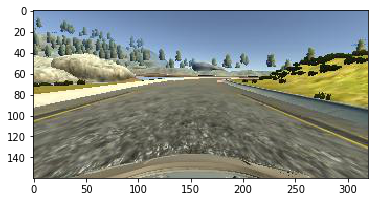

In [5]:
TEST2 = cv2.cvtColor(srcBGR , cv2.COLOR_BGR2RGB)
plt.imshow(TEST2)

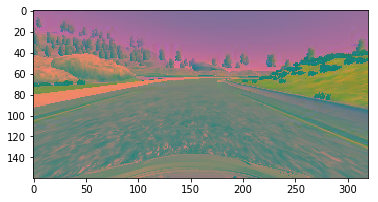

In [6]:
plt.imshow(pil_image)

0.0


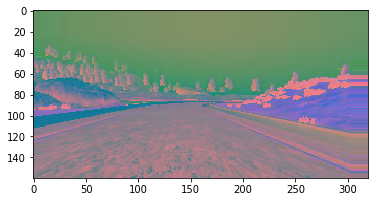

In [10]:
plt.imshow(image_shift)
print(input_angle)

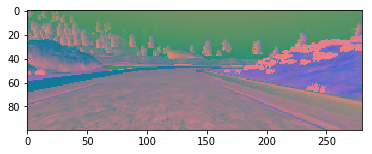

In [11]:
#img2 = input_angle.crop((40, 20, 20, 20))
plt.imshow(image_shift[40:140,20:300,:])

In [12]:
np.array_equal(pil_image,input_image)

True